# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

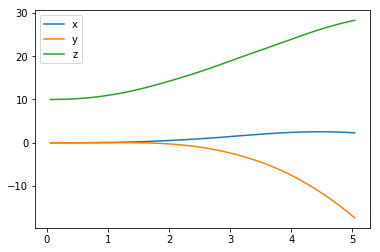

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

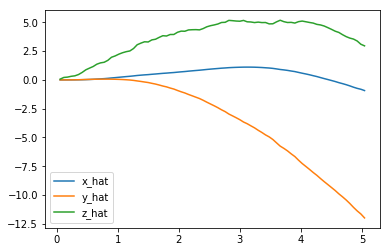

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

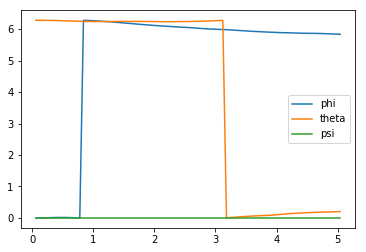

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

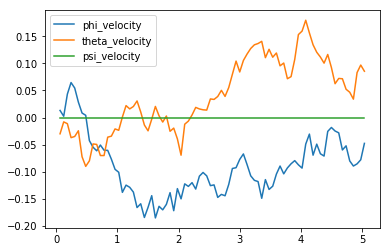

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

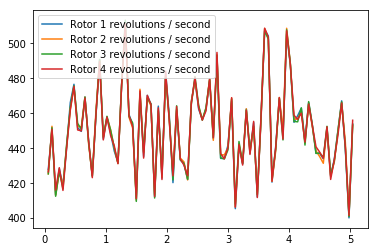

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  2.27831627 -17.37562394  28.32112881   5.83710429   0.20401771   0.        ]
[ -0.92523992 -11.98154454   2.95616711]
[-0.04753902  0.0855215   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   6.424 (best =  16.553), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [28]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 2000
start_pos = np.array([5., 5., 0.,0.,0.,0.])
task = Task(init_pose=start_pos)
agent = DDPG(task) 
scores=[]

with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward,next_state, done)
            state = next_state
            
            if done:
                to_write =[i_episode] + [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
                writer.writerow(to_write)
                print("\rEpisode = {:4d}, Score = {:7.3f}".format(i_episode,agent.score))
                scores.append(agent.score)
                #print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                #    i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
                break
    

Episode =    1, Score =   0.000
Episode =    2, Score =   0.000
Episode =    3, Score =   0.000
Episode =    4, Score =   0.000
Episode =    5, Score =   0.000
Episode =    6, Score =   0.000
Episode =    7, Score =  12.611
Episode =    8, Score =  10.203
Episode =    9, Score =  -8.200
Episode =   10, Score =  -8.535
Episode =   11, Score =  -8.817
Episode =   12, Score =  -1.087
Episode =   13, Score =  -1.212
Episode =   14, Score =  -1.325
Episode =   15, Score =  -1.422
Episode =   16, Score =  -1.506
Episode =   17, Score =  -1.568
Episode =   18, Score =  -1.630
Episode =   19, Score =  -1.679
Episode =   20, Score =  -1.728
Episode =   21, Score =  -1.772
Episode =   22, Score =  -1.814
Episode =   23, Score = -15.241
Episode =   24, Score = -15.250
Episode =   25, Score = -15.259
Episode =   26, Score = -15.266
Episode =   27, Score = -15.273
Episode =   28, Score = -15.278
Episode =   29, Score = -15.284
Episode =   30, Score = -15.290
Episode =   31, Score = -15.295
Episode 

Episode =  259, Score =   4.381
Episode =  260, Score =   4.364
Episode =  261, Score =   4.354
Episode =  262, Score =   4.362
Episode =  263, Score =   4.359
Episode =  264, Score =   4.368
Episode =  265, Score =   4.374
Episode =  266, Score =  -3.266
Episode =  267, Score =  -3.237
Episode =  268, Score =  -3.228
Episode =  269, Score =  -3.246
Episode =  270, Score =  -3.223
Episode =  271, Score =  -3.261
Episode =  272, Score =  -3.266
Episode =  273, Score =  -3.255
Episode =  274, Score =  -3.254
Episode =  275, Score =   4.364
Episode =  276, Score =   4.382
Episode =  277, Score =   4.368
Episode =  278, Score =   4.373
Episode =  279, Score =   4.357
Episode =  280, Score =   4.355
Episode =  281, Score =   4.344
Episode =  282, Score =   4.373
Episode =  283, Score =   4.340
Episode =  284, Score =   4.355
Episode =  285, Score =   4.318
Episode =  286, Score =   4.335
Episode =  287, Score =   4.316
Episode =  288, Score =   4.317
Episode =  289, Score =   4.309
Episode 

Episode =  517, Score =  -9.017
Episode =  518, Score =  -8.411
Episode =  519, Score =  -1.793
Episode =  520, Score =   2.425
Episode =  521, Score =  -1.278
Episode =  522, Score =  -1.726
Episode =  523, Score =  -2.240
Episode =  524, Score =  -8.767
Episode =  525, Score =  -9.260
Episode =  526, Score =  -1.107
Episode =  527, Score =  -1.049
Episode =  528, Score =  -1.084
Episode =  529, Score =  -1.088
Episode =  530, Score =  -0.945
Episode =  531, Score =  -0.739
Episode =  532, Score =  -8.873
Episode =  533, Score =  -8.186
Episode =  534, Score =  -1.455
Episode =  535, Score =   3.926
Episode =  536, Score =  -0.974
Episode =  537, Score =  -1.041
Episode =  538, Score =   6.454
Episode =  539, Score =   6.505
Episode =  540, Score =   6.526
Episode =  541, Score =   6.471
Episode =  542, Score =   6.485
Episode =  543, Score =   6.519
Episode =  544, Score =   6.483
Episode =  545, Score =   6.508
Episode =  546, Score =   6.532
Episode =  547, Score =   6.469
Episode 

Episode =  775, Score =  -0.730
Episode =  776, Score =  -1.447
Episode =  777, Score =  -0.761
Episode =  778, Score =  -1.104
Episode =  779, Score =  -1.856
Episode =  780, Score =  -1.620
Episode =  781, Score =  -1.750
Episode =  782, Score =  -1.809
Episode =  783, Score =  -8.297
Episode =  784, Score =  -9.113
Episode =  785, Score =  -9.238
Episode =  786, Score =  -9.152
Episode =  787, Score =  -8.253
Episode =  788, Score =  -1.987
Episode =  789, Score =  -1.637
Episode =  790, Score =  -1.765
Episode =  791, Score =  -1.514
Episode =  792, Score =  -1.676
Episode =  793, Score =  -1.954
Episode =  794, Score =  -2.438
Episode =  795, Score =  -2.546
Episode =  796, Score =  -2.347
Episode =  797, Score =  -2.497
Episode =  798, Score =  -9.751
Episode =  799, Score =  -3.018
Episode =  800, Score =   5.944
Episode =  801, Score =   3.606
Episode =  802, Score =   8.885
Episode =  803, Score =   7.210
Episode =  804, Score =  14.057
Episode =  805, Score =  12.810
Episode 

Episode = 1033, Score = -15.296
Episode = 1034, Score = -15.314
Episode = 1035, Score = -15.348
Episode = 1036, Score = -15.379
Episode = 1037, Score = -15.397
Episode = 1038, Score = -15.409
Episode = 1039, Score = -15.428
Episode = 1040, Score = -15.402
Episode = 1041, Score = -15.292
Episode = 1042, Score = -15.148
Episode = 1043, Score =  -1.799
Episode = 1044, Score =  -1.692
Episode = 1045, Score =  -1.483
Episode = 1046, Score =  -1.253
Episode = 1047, Score =  -1.017
Episode = 1048, Score =  -0.812
Episode = 1049, Score =  -0.689
Episode = 1050, Score =  -0.535
Episode = 1051, Score =  -0.398
Episode = 1052, Score =  -0.319
Episode = 1053, Score =  -0.534
Episode = 1054, Score =  -0.634
Episode = 1055, Score =  -0.847
Episode = 1056, Score =  -1.074
Episode = 1057, Score =  -1.250
Episode = 1058, Score =  -1.281
Episode = 1059, Score =  -1.646
Episode = 1060, Score = -15.043
Episode = 1061, Score = -15.117
Episode = 1062, Score = -15.187
Episode = 1063, Score = -15.215
Episode 

Episode = 1290, Score =   7.445
Episode = 1291, Score =  10.486
Episode = 1292, Score =   9.148
Episode = 1293, Score =  11.290
Episode = 1294, Score =   8.669
Episode = 1295, Score =   9.632
Episode = 1296, Score =   8.076
Episode = 1297, Score =   7.551
Episode = 1298, Score =   8.511
Episode = 1299, Score =   8.692
Episode = 1300, Score =   6.716
Episode = 1301, Score =   9.081
Episode = 1302, Score =   8.758
Episode = 1303, Score =   8.426
Episode = 1304, Score =   6.716
Episode = 1305, Score =   9.420
Episode = 1306, Score =   8.478
Episode = 1307, Score =   8.725
Episode = 1308, Score =   9.240
Episode = 1309, Score =   8.478
Episode = 1310, Score =  11.905
Episode = 1311, Score =   6.140
Episode = 1312, Score =   9.394
Episode = 1313, Score =   9.057
Episode = 1314, Score =   9.602
Episode = 1315, Score =  11.492
Episode = 1316, Score =  10.827
Episode = 1317, Score =  10.144
Episode = 1318, Score =   6.974
Episode = 1319, Score =   7.440
Episode = 1320, Score =   9.179
Episode 

Episode = 1547, Score =   6.133
Episode = 1548, Score =   5.963
Episode = 1549, Score =   6.120
Episode = 1550, Score =   5.883
Episode = 1551, Score =   9.844
Episode = 1552, Score =  13.469
Episode = 1553, Score =  13.152
Episode = 1554, Score =   9.517
Episode = 1555, Score =  10.823
Episode = 1556, Score =  12.604
Episode = 1557, Score =  13.874
Episode = 1558, Score =  84.303
Episode = 1559, Score =  83.853
Episode = 1560, Score =  83.303
Episode = 1561, Score =  83.152
Episode = 1562, Score =  84.226
Episode = 1563, Score =  83.996
Episode = 1564, Score =  52.819
Episode = 1565, Score =  11.218
Episode = 1566, Score =  11.390
Episode = 1567, Score =  10.320
Episode = 1568, Score =   9.381
Episode = 1569, Score =  47.869
Episode = 1570, Score =  10.453
Episode = 1571, Score =  10.670
Episode = 1572, Score =   8.866
Episode = 1573, Score =   7.258
Episode = 1574, Score =   6.207
Episode = 1575, Score =   6.100
Episode = 1576, Score =   6.117
Episode = 1577, Score =  10.723
Episode 

Episode = 1804, Score =  83.077
Episode = 1805, Score =  83.783
Episode = 1806, Score =   7.895
Episode = 1807, Score =   7.834
Episode = 1808, Score =   7.759
Episode = 1809, Score =  -1.830
Episode = 1810, Score =   9.061
Episode = 1811, Score =   9.444
Episode = 1812, Score =   9.065
Episode = 1813, Score =  10.509
Episode = 1814, Score =   6.682
Episode = 1815, Score =   9.506
Episode = 1816, Score =   9.128
Episode = 1817, Score =   6.685
Episode = 1818, Score =   8.842
Episode = 1819, Score =   6.647
Episode = 1820, Score =  11.142
Episode = 1821, Score =   6.518
Episode = 1822, Score =   7.041
Episode = 1823, Score =  10.221
Episode = 1824, Score =   7.177
Episode = 1825, Score =   9.195
Episode = 1826, Score =   7.256
Episode = 1827, Score =   7.266
Episode = 1828, Score =  10.013
Episode = 1829, Score =   9.852
Episode = 1830, Score =  10.051
Episode = 1831, Score =   9.645
Episode = 1832, Score =  10.262
Episode = 1833, Score =   6.481
Episode = 1834, Score =   8.730
Episode 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

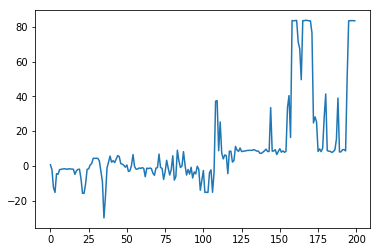

In [30]:
## TODO: Plot the rewards.
avg_scores=[]

for ii in range(0,len(scores),10):
    avg_scores.append(sum(scores[ii : ii + 10])/10.)
    
#print(avg_scores)
plt.plot(avg_scores)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I decided to try to learn the takeoff. Using only the height (z-coord) as reward proved not to work very well. Thus I added the speed in z-direction and it turned out to be better to use the runtime as well in order to prevent the quadcopter from crashing. Additionaly I added some negative reward for Euler angles different from zero trying to stabilize the position (the angles) of the quadcopter and a negative reward of 10 when the quadcopter crashed before the episod was over.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I decided to use the Actor-Critic algorithm that is given, hoping to understand better what is going on there and to get some experience with this algorithm. Even though I tried changing the parameters (gamma, tau, exploration-parameters) I never got better results than with those given. In the architectures of actor and critic I added some fully connected layers as well as batch normalization and some Dropout. In the end I had for the actor 4 dense layers with relu-activation and sizes 32,64,128,256 (with dropout and batch normalization) followed by the dense layer of size equal to the action_size with sigmoid activation.

In the critic I used for both actions and states the same architecture consisting of fully connected layers of sizes 64,128,256 with relu activation and batch normalization. Then one layer combining these and finally a layer of size 1 for the Q-values.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:The task of learning to takeoff was not as easy as I thought, because the quadcopter always crashed very early and it was not easy to reach a behavior where it actually remains in the air for the whole episode. While the performance was improving over time there still was a moment when it increased a lot and then remained relatively stable for a while before it got worse again. At the end the quadcopter was able to fly during the whole episode again.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: Getting started was really difficult so I decided to use the code given for the actor critic method. After I first had to get to a better understanding how this method works and how things are put together. Then there was a lot of stuff that could be changed trying to improve the performance and it was difficult to find out where to start. At the beginning I thought it was most important to adjust the architecture and tune parameters but it turned out that changing the reward function had even greater influence on the results.